### 데이터 준비 단계

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# MNIST데이터 로드

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape) 
print(y_train.shape) 

(60000, 28, 28)
(60000,)


정답 : 5


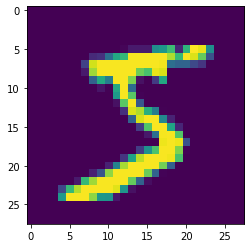

In [22]:
print('정답 :',y_train[0])

plt.imshow(x_train[0])
plt.show()

In [23]:
# 표준화
x_train, x_test = x_train/255.0, x_test/255.0 # 데이터 Normalization MNIST의 픽셀값은 0~255사이 값으로 이루어져있다. 그래서 최대값인 255로 나눠주면 0~1사이 값으로 변환되게 된다.

y_train = tf.keras.utils.to_categorical(y_train, 10) # train데이터의 정답을 one-hot인코딩한다.
y_test = tf.keras.utils.to_categorical(y_test, 10) # test데이터의 정답을 one-hot인코딩한다.

In [24]:
y_train.shape

(60000, 10)

In [25]:
y_test[:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### 모델 구축

Sequential model 을 사용하여 위의 (1)에서 전처리한 Input 이미지 데이터를 받아서, 1개의 완전히 연결된 은닉층 (Fully Connected Hidden Layer) 을 쌓고, 10개의 classes 별 확률을 반환하는 FC(Fully Connected) Output Layer 를 쌓아서 만든 DNN(Deep Neural Network) 모델

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


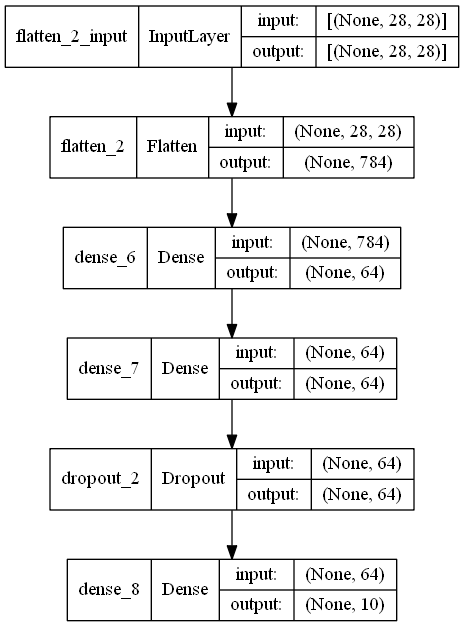

In [26]:
# DNN

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 여기는 꼭  데이터의 input shape로 하자, Flatten 이 친구는 input shape가 28*28으로 2차원 인데 1차원으로 펴주는 역할을 한다. 즉, 28*28해서 784가 나온다.
    tf.keras.layers.Dense(64, activation = 'relu'), # 64는 딥러닝의 노드(동그라미)의 갯수 설정, activation function은 여러가지가 많은데 "activation function"이라는 키워드로 찾아보면 많이 나온다. 가장 좋다고 소문난 relu로 학습
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.2), # 드랍아웃으로 과적합 방지("drop out"이라는 키워드로 찾아보면 더 많은 자료를 볼 수 있다.)
    tf.keras.layers.Dense(10, activation = 'softmax') # 여기는 최종 출력될 것들 우리는 각 클래스별로 확률값을 출력할 것이기 때문에 다중분류에 쓰이는 softmax를 사용
])
model.summary() # 모델이 어떻게 구성되어있는지 출력
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True)

### 모델 컴파일

In [27]:
model.compile(optimizer = 'adam',  # 최적화 알고리즘 적용(찾아보면 엄청 많으니까 "딥러닝 최적화 알고리즘"이라는 키워드로 찾아보는 것도 좋다)
              loss = 'categorical_crossentropy', # loss도 우리가 정의해줄수 있는데 우리가 풀려고 하는 문제(회귀,분류 등)에 따라 달라지니 궁금하면 찾아보자 
              metrics = ['accuracy']) # 우리가 볼 지표, 이것도 회귀문제냐 분류문제냐에 따라 다르다 여기에서는 분류 문제이기때문에 Accuracy를 사용한다

model.fit(x_train, y_train, batch_size = 100, epochs = 10, validation_data = (x_test, y_test)) # batch_size는 100개씩 묶어서 학습 그래서 60000/100 = 600, epochs는 10번 반복학습,

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.4287 - accuracy: 0.8733 - val_loss: 0.1859 - val_accuracy: 0.9447
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1859 - accuracy: 0.9455 - val_loss: 0.1329 - val_accuracy: 0.9597
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1400 - accuracy: 0.9586 - val_loss: 0.1112 - val_accuracy: 0.9660
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1157 - accuracy: 0.9652 - val_loss: 0.0974 - val_accuracy: 0.9707
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0963 - accuracy: 0.9708 - val_loss: 0.0941 - val_accuracy: 0.9705
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.9743 - val_loss: 0.0879 - val_accuracy: 0.9739
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9776 - val_loss: 0.0850 - val_accuracy: 0.9750
Epoch 

In [28]:
model.evaluate(x_test,  y_test, verbose = 2) # 모델 평가

313/313 - 1s - loss: 0.0832 - accuracy: 0.9767 - 527ms/epoch - 2ms/step


[0.08321169763803482, 0.9767000079154968]

x_test의 0번째 정답은 : 7
실제 0번째 정답은 : 7


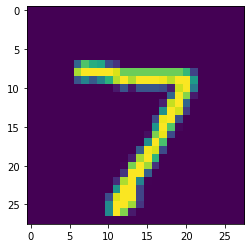

In [29]:
pred = model.predict(x_test) # 모델에 x_test를 넣어서 예측

print('x_test의 0번째 정답은 :',np.argmax(pred[0])) # 모델이 예측한 x_test의 첫번째 값
print('실제 0번째 정답은 :',np.argmax(y_test[0])) # 실제 정답

plt.imshow(x_test[0].reshape(28,28)) # 이미지 출력

x_test의 0 번째 예측 : 7 실제 정답은 :  7
x_test의 1 번째 예측 : 2 실제 정답은 :  2
x_test의 2 번째 예측 : 1 실제 정답은 :  1
x_test의 3 번째 예측 : 0 실제 정답은 :  0
x_test의 4 번째 예측 : 4 실제 정답은 :  4
x_test의 5 번째 예측 : 1 실제 정답은 :  1
x_test의 6 번째 예측 : 4 실제 정답은 :  4
x_test의 7 번째 예측 : 9 실제 정답은 :  9
x_test의 8 번째 예측 : 5 실제 정답은 :  5
x_test의 9 번째 예측 : 9 실제 정답은 :  9


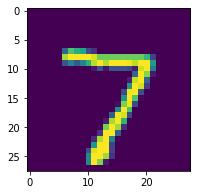

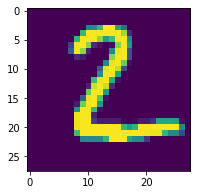

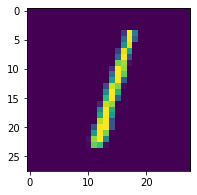

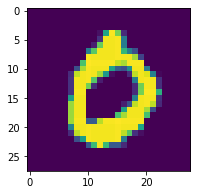

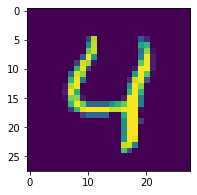

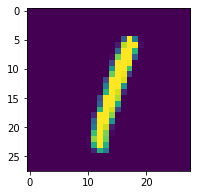

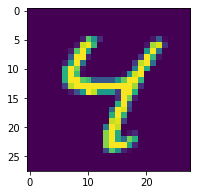

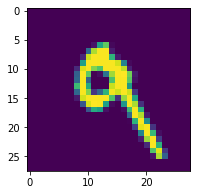

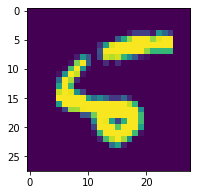

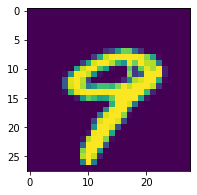

In [30]:
for i in range(10):
  print('x_test의 {} 번째 예측 :'.format(i) ,np.argmax(pred[i]),'실제 정답은 : ',np.argmax(y_test[i]))
  f, ax = plt.subplots(figsize = (3,3))
  plt.imshow(x_test[i].reshape(28,28))